In [2]:
!pip install keras== 2.12.0



ERROR: Could not find a version that satisfies the requirement keras== (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for keras==


In [3]:
pip install scikeras


In [4]:
!pip install tensorflow


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn. ensemble import RandomForestClassifier
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.metrics import roc_auc_score,accuracy_score
from keras.models import model_from_json



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.drop('customerID', axis=1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Application of the LabelEncoder

In [13]:
label_encoder=LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
  df[column]= label_encoder.fit_transform(df[column])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [15]:
x=df.drop('Churn', axis =1)
y = df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [17]:
classifier = RandomForestClassifier()
classifier .fit(x,y)

RandomForestClassifier()

In [18]:

importance = classifier.feature_importances_
df_importance=pd.DataFrame({'Feature': x.columns, 'Importance':importance})
df_importance=df_importance.sort_values(by='Importance', ascending = False)
important_features=df_importance['Feature'][:5]

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
important_features

4             tenure
17    MonthlyCharges
18      TotalCharges
14          Contract
16     PaymentMethod
Name: Feature, dtype: object

Question 2

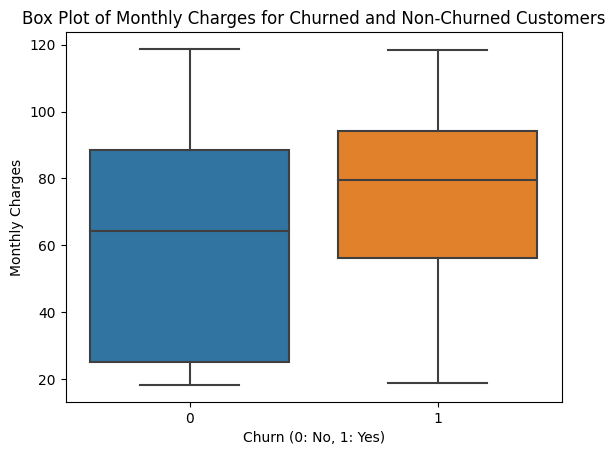

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt


df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')


df = df.dropna(subset=['MonthlyCharges'])

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Box Plot of Monthly Charges for Churned and Non-Churned Customers')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Monthly Charges')
plt.show()

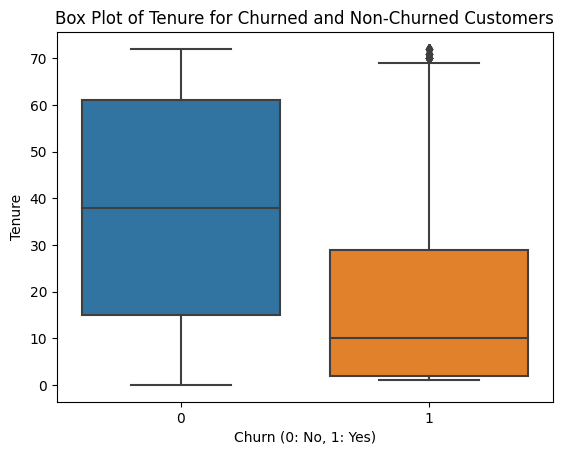

In [22]:
 import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Box Plot of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Tenure')
plt.show()

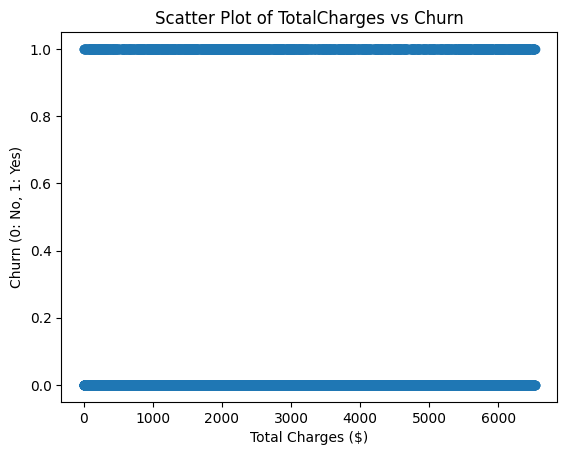

In [23]:
 import matplotlib.pyplot as plt


plt.scatter(df['TotalCharges'], df['Churn'])
plt.title('Scatter Plot of TotalCharges vs Churn')
plt.xlabel('Total Charges ($)')
plt.ylabel('Churn (0: No, 1: Yes)')
plt.show()

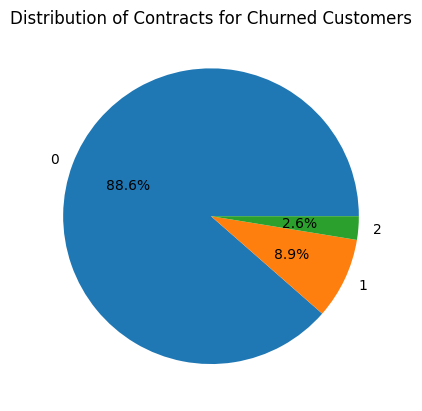

In [24]:
 import matplotlib.pyplot as plt

churned_contracts = df[df['Churn'] == 1]['Contract'].value_counts()
plt.pie(churned_contracts, labels=churned_contracts.index, autopct='%1.1f%%')
plt.title('Distribution of Contracts for Churned Customers')
plt.show()

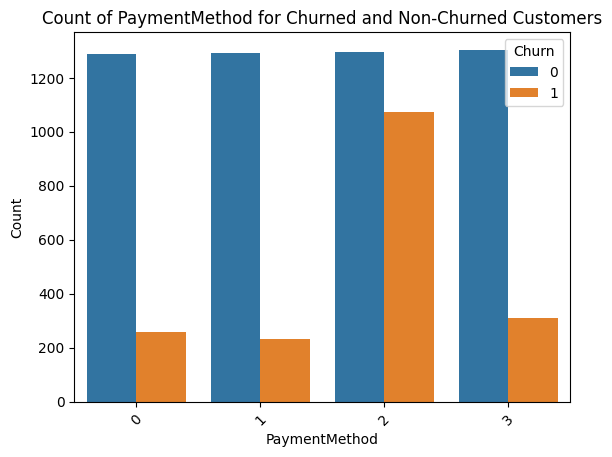

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Count of PaymentMethod for Churned and Non-Churned Customers')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
X = df[important_features]
Y = df['Churn']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [28]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense


def create_model(optimizer='adam'):
    visible = Input(shape=(len(important_features),))
    hidden1 = Dense(10, activation='relu')(visible)
    hidden2 = Dense(20, activation='relu')(hidden1)
    hidden3 = Dense(10, activation='relu')(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)
    model = Model(inputs=visible, outputs=output)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


param_grid = {
    'optimizer': ['adam', 'rmsprop'],
}


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


keras_model = KerasClassifier(model=create_model, loss='binary_crossentropy', metrics=['accuracy'], batch_size=32, epochs=10, verbose=0)


grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train_scaled, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.782748 using {'optimizer': 'adam'}


In [29]:

best_model = grid_result.best_estimator_

In [30]:

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc:.4f}')

Accuracy: 0.7956
AUC Score: 0.8509


In [31]:
# Train the best model
best_model.fit(X_train_scaled, y_train)



KerasClassifier(
	model=<function create_model at 0x7a4f7b4f48b0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=binary_crossentropy
	metrics=['accuracy']
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [1]:
import joblib

In [34]:
joblib.dump(best_model, 'best_keras_model.pkl')

['best_keras_model.pkl']

In [33]:
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']